In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/CarPrice_Assignment.csv")

df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
print("Duplicate Values =", df.duplicated().sum())

Duplicate Values = 0


In [ ]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
# Попробуем выделить производителя автомобилей отдельно он наименования самой модели.
df.insert(1, 'Company', df['CarName'].str.split(' ').str[0])
df.drop(columns=['CarName'], inplace=True)
df.head()

,car_ID,Company,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,alfa-romero,3,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,alfa-romero,3,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,alfa-romero,1,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,audi,2,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,audi,2,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df['Company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [ ]:
# Исправим ошибки в названиях.
correct_company_name = {
    'maxda': 'mazda',
    'Nissan': 'nissan',
    'porcshce': 'porsche',
    'toyouta': 'toyota',
    'vokswagen': 'volkswagen',
    'vw': 'volkswagen',
}

df['Company'].replace(correct_company_name, inplace=True)
df['Company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [ ]:
df.drop(columns=['car_ID'], inplace=True)

In [ ]:
import plotly.express as px

company_prices = df.groupby('Company')['price'].mean().reset_index()

fig = px.bar(company_prices, x='Company', y='price', title= 'Average Car price by Company')
fig.update_xaxes(categoryorder='total descending')
fig.update_layout(xaxis_title='Company', yaxis_title='Average price')
fig.show()

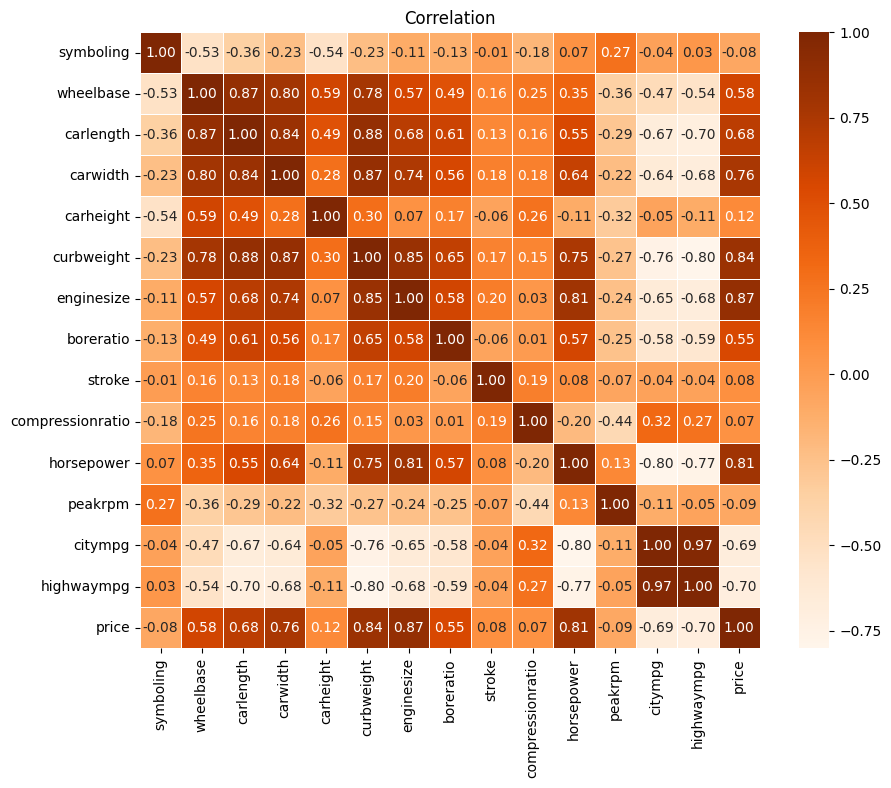

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_map = df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(correlation_map, annot=True, cmap='Oranges', fmt='.2f', linewidths=0.5)
plt.title('Correlation')
plt.show()



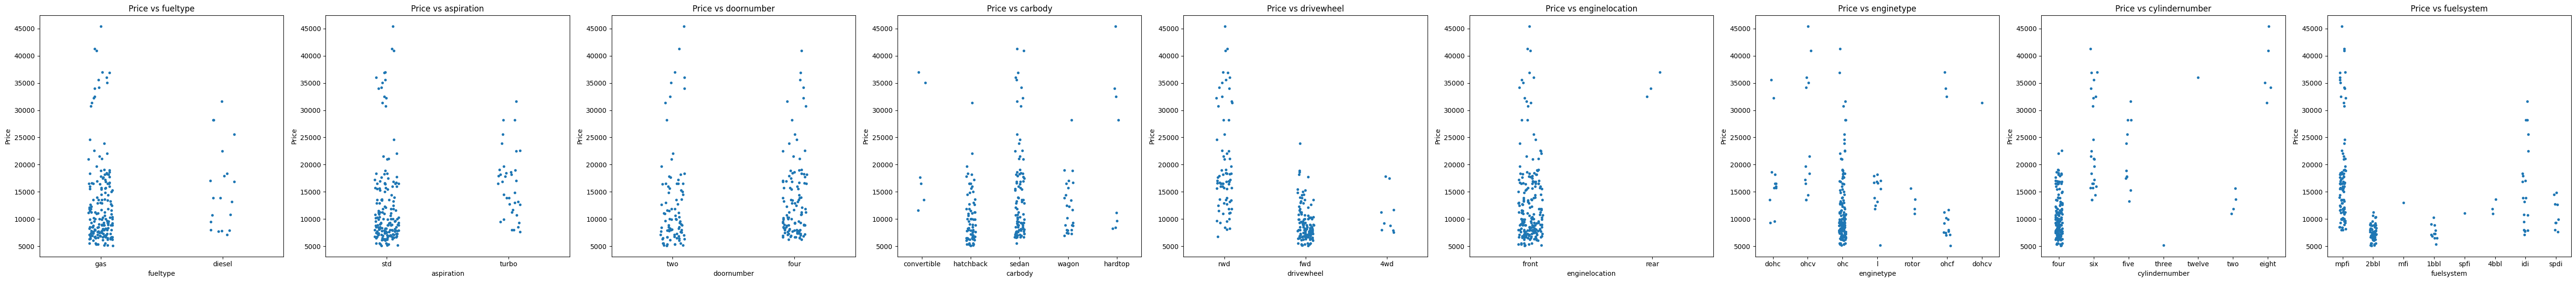

In [ ]:
categorical_columns = ["fueltype", "aspiration", "doornumber", "carbody", "drivewheel", "enginelocation", "enginetype", "cylindernumber", "fuelsystem"]

num_cols = len(categorical_columns)
fig, axes = plt.subplots(1, num_cols, figsize=(6 * num_cols, 6))

for i, col in enumerate(categorical_columns):
    sns.stripplot(x=col, y="price", data=df, ax=axes[i], size=4)
    axes[i].set_title(f"Price vs {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Price")

plt.tight_layout()
plt.show()

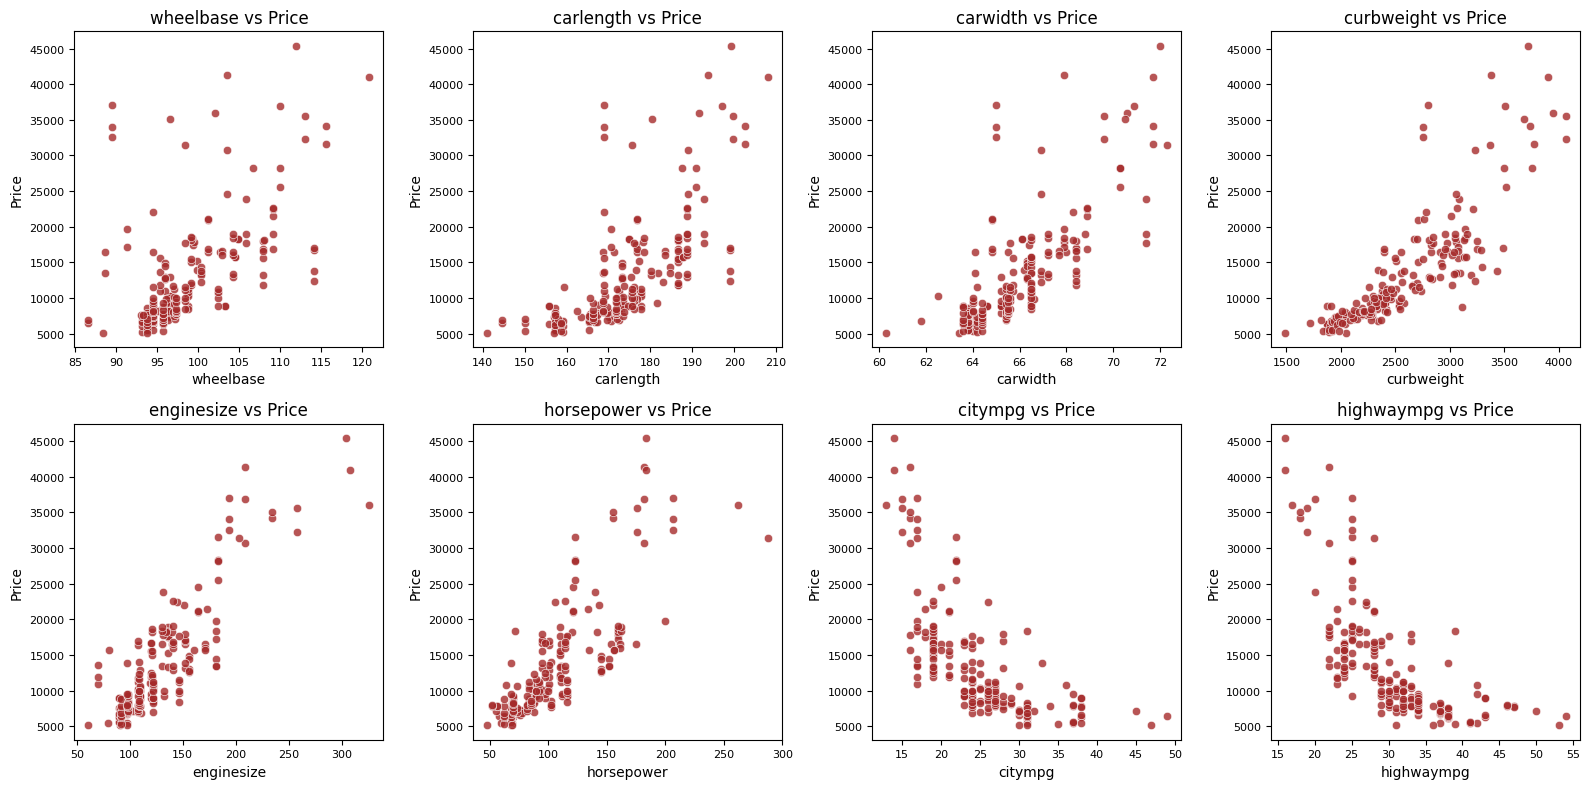

In [ ]:
numerical_columns = ["wheelbase", "carlength", "carwidth", "curbweight", "enginesize", "horsepower", "citympg", "highwaympg"]

sns.set_palette("cool")

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.scatterplot(data=df, x=col, y="price", ax=axes[i], alpha=0.8, color="brown")
    axes[i].set_title(f"{col} vs Price", fontsize=12)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel("Price", fontsize=10)
    axes[i].tick_params(axis="both", labelsize=8)

plt.tight_layout()
plt.show()

In [ ]:
df_new = df.drop(columns=['symboling','wheelbase','boreratio','stroke','compressionratio','peakrpm','Company'])
df_new.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,horsepower,citympg,highwaympg,price
0,gas,std,two,convertible,rwd,front,168.8,64.1,48.8,2548,dohc,four,130,mpfi,111,21,27,13495.0
1,gas,std,two,convertible,rwd,front,168.8,64.1,48.8,2548,dohc,four,130,mpfi,111,21,27,16500.0
2,gas,std,two,hatchback,rwd,front,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,154,19,26,16500.0
3,gas,std,four,sedan,fwd,front,176.6,66.2,54.3,2337,ohc,four,109,mpfi,102,24,30,13950.0
4,gas,std,four,sedan,4wd,front,176.6,66.4,54.3,2824,ohc,five,136,mpfi,115,18,22,17450.0


In [ ]:
df_new = pd.get_dummies(columns=['fueltype', 'enginelocation', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber', 'fuelsystem'], data=df_new)
df_new.head()

,carlength,carwidth,carheight,curbweight,enginesize,horsepower,citympg,highwaympg,price,fueltype_diesel,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,168.8,64.1,48.8,2548,130,111,21,27,13495.0,0,...,0,0,0,0,0,0,0,1,0,0
1,168.8,64.1,48.8,2548,130,111,21,27,16500.0,0,...,0,0,0,0,0,0,0,1,0,0
2,171.2,65.5,52.4,2823,152,154,19,26,16500.0,0,...,0,0,0,0,0,0,0,1,0,0
3,176.6,66.2,54.3,2337,109,102,24,30,13950.0,0,...,0,0,0,0,0,0,0,1,0,0
4,176.6,66.4,54.3,2824,136,115,18,22,17450.0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
import pickle

import warnings
warnings.filterwarnings("ignore")

scaler = StandardScaler()
numerical_columns = df_new.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns.remove('price')
numerical_columns

['carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'horsepower',
 'citympg',
 'highwaympg']

In [ ]:
df_new[numerical_columns] = scaler.fit_transform(df_new[numerical_columns])

In [ ]:
# Создадим модель. Мы будем использовать Линейную регрессию и метод Решающих деревьев.

X = df_new.drop(columns=['price'])
y = df_new['price'].values.reshape(-1,1)

X.shape

(205, 46)

In [ ]:
y.shape

(205, 1)

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=10)

y_train = y_train.ravel()
y_test = y_test.ravel()

linear_regr = LinearRegression()
linear_regr.fit(X_train, y_train)
y_pred = linear_regr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

In [ ]:
print(y_pred)
print('R2 =', r2_score(y_test, y_pred))
print('mse =', mse)

[11437.22535129 17987.61633914 11385.41192538 12285.33179745
 35963.61557424 12117.09977047  5419.16676235 14407.89681148
  8463.86175847 24985.79625652 15312.23428446 11999.4185893
  7340.75375864 15483.31225583 47482.4366094  17469.56094458
 10844.49919842 17044.66268073 11137.7712189  14718.74539315
  7830.07956276 11785.33618009 14302.44537916 22215.69312318
 19963.18313856 20921.76407336 10363.07646183  6319.77998903
 10640.12892832 16530.64941117  6098.33449396  5865.50367265
  6191.80795253 15957.10963129 27246.61159179 25285.51477959
 10646.72475839 17275.49204541  8498.84498943  5861.21990296
 12326.48508886]
R2 = 0.7507794614989729
mse = 12880606.262997188


In [ ]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
y_pred2 = decision_tree.predict(X_test)
mse2 = mean_squared_error(y_test, y_pred2)

In [ ]:
print(y_pred2)
print('R2 =', r2_score(y_test, y_pred2))
print('mse =', mse2)

[ 9295. 16630. 13950. 10945. 45400. 10245.  6529. 11199.  9258. 24565.
 13950. 10295.  7995. 13860. 41315. 15690.  8845. 16900. 13495. 20970.
  7099. 16925.  9639. 15998. 18920. 18420.  9549.  6649. 10295. 23875.
  6338.  9095.  6095. 13495. 25552. 25552. 12964. 15690. 11259.  5572.
 10295.]
R2 = 0.8004007744936574
mse = 10315999.835365854


In [ ]:
# 83% точости это неплохо. Но мне как получателю некого прогноза , конечно, хотелось бы знать точнее.
# Попробуем еще метод Случайный лес.
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred3 = random_forest.predict(X_test)
mse3 = mean_squared_error(y_test, y_pred3)

In [ ]:
print(y_pred3)
print('R2 =', r2_score(y_test, y_pred3))
print('mse =', mse3)

[10715.07       18609.71334    10522.11       11684.55
 37982.85       10411.35        6946.625      15591.50501
  8320.107      18991.         12563.15       10518.51
  7482.29       14831.67       35780.93142857 18644.54501
  9430.55       15774.73       12555.42       17070.36167
  7295.65166667 14983.45       10009.42       16886.00167
 18306.68       17813.28505     9477.64        8202.46
  9852.26       19140.34334     6679.5         7631.45
  6095.095      12886.58167    28449.77       26187.33
 14896.66167    18706.53       10131.79        5931.1
 10540.09      ]
R2 = 0.8966236658806309
mse = 5342857.634095626


[11200.26       18385.53167    10453.17       11615.54
 38195.05       10273.62        7068.585      15717.56
  8080.495      19375.97       13093.9        10429.89
  7466.95       13909.97       35643.53       19231.38167
  9464.77       15475.02       12920.34       16220.19334
  7278.4225     15100.12       10368.68       16895.24167
 19239.19       17832.9867      9504.42        8129.01916667
  9714.77       18981.43167     6701.52        7731.62
  6130.08       12479.37167    27980.04       25881.73
 15309.64       19279.06       10242.52        5952.495
 10395.85      ]
R2 = 0.8856653788886787
mse = 5909220.988052019


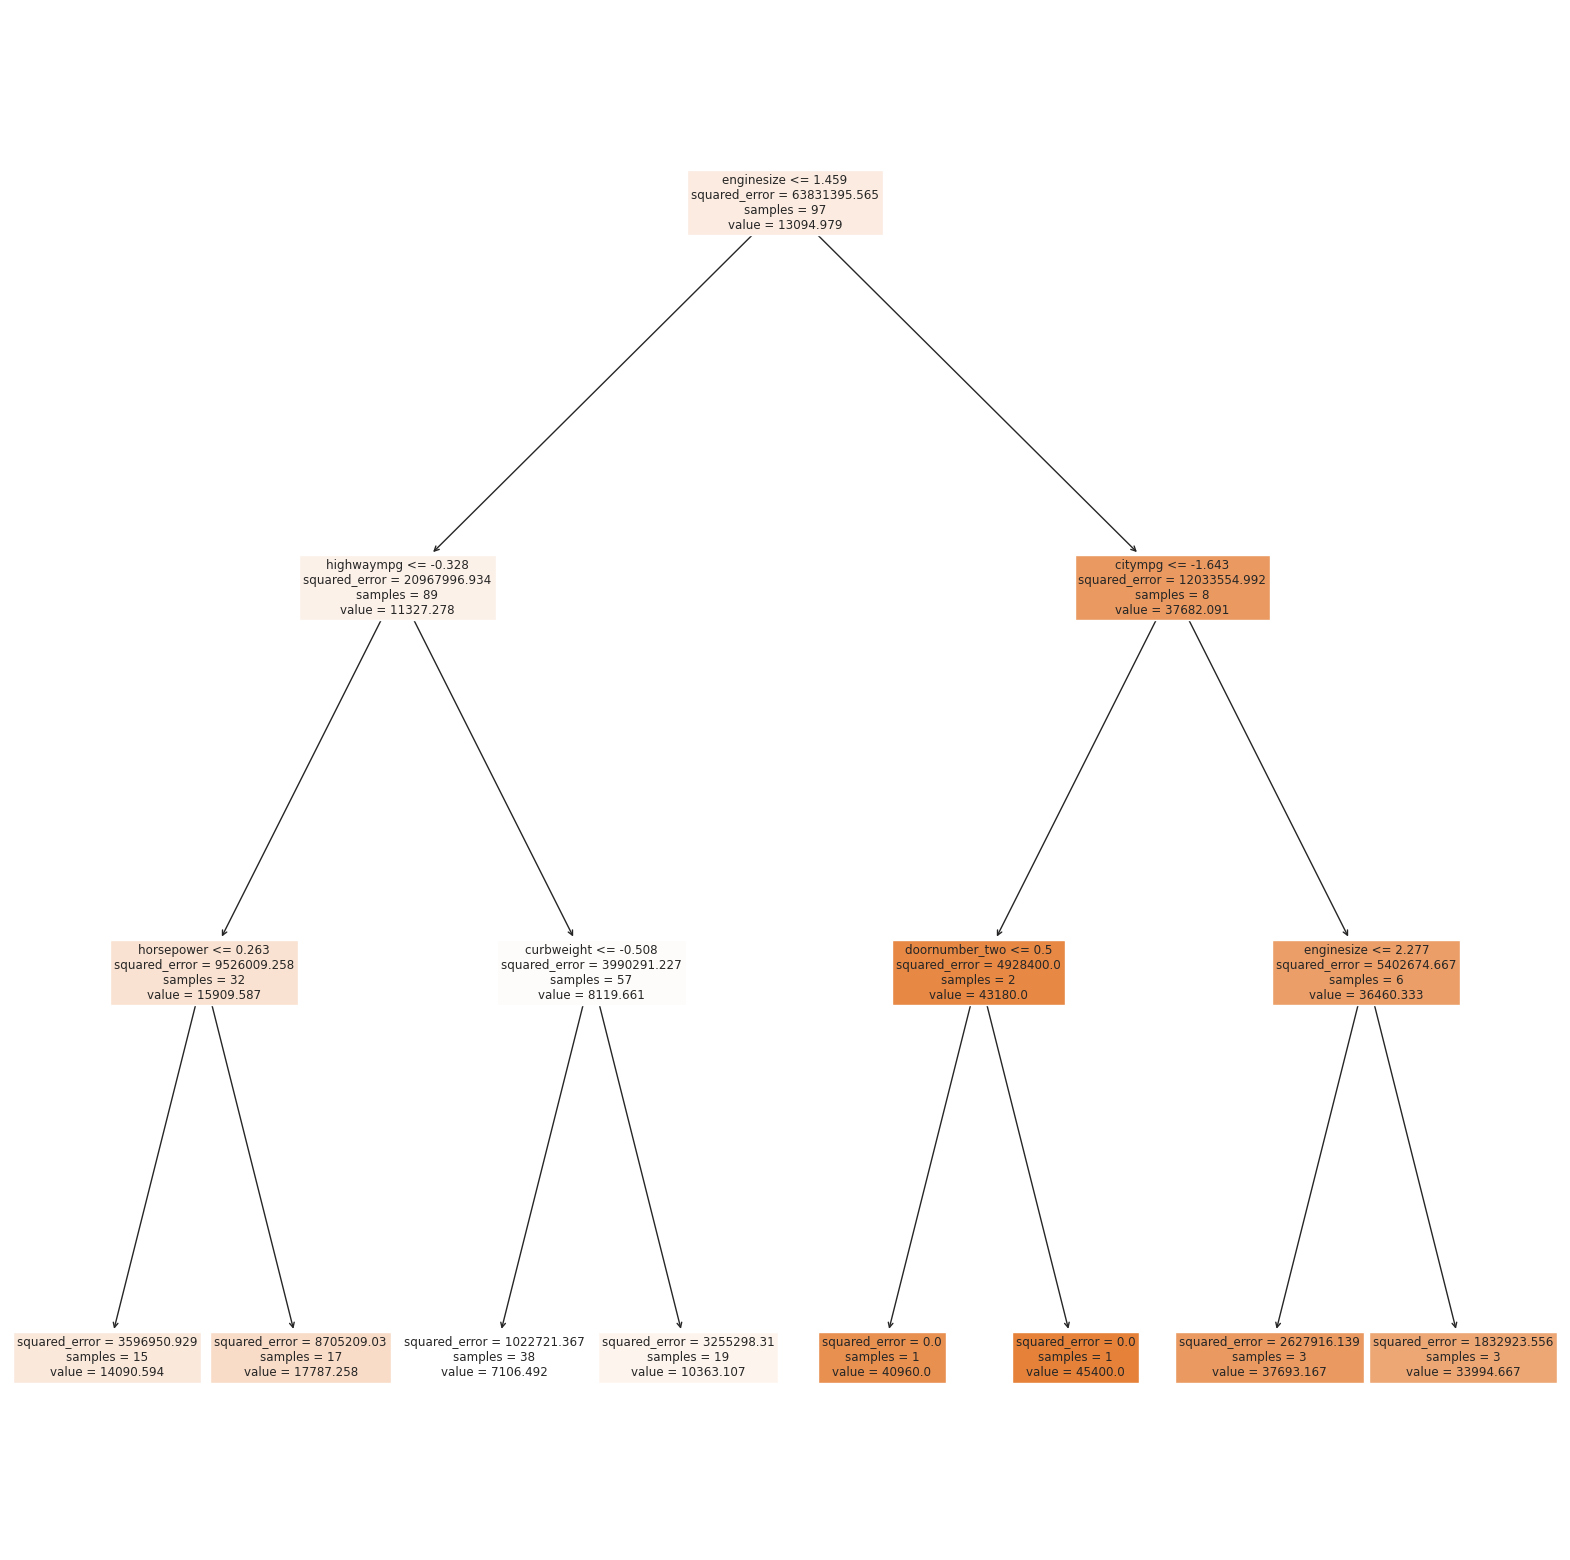

In [ ]:
# Визуализируем результаты наилучшей модели. Для удобства я создам новую переменную, чтобы не задевать предыдущий код.

from sklearn import tree

rf = RandomForestRegressor(n_estimators=100, max_depth=3)
rf.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print(y_pred_rf)
print('R2 =', r2_score(y_test, y_pred_rf))
print('mse =', mse_rf)

plt.figure(figsize=(20,20))
_ = tree.plot_tree(rf.estimators_[0], feature_names=X.columns, filled=True)


In [ ]:
from sklearn.linear_model import Lasso

model_lasso = Lasso()
model_lasso.fit(X_train, y_train)
y_pred4 = model_lasso.predict(X_test)
mse4 = mean_squared_error(y_test, y_pred4)

In [ ]:
print(y_pred4)
print('R2 =', r2_score(y_test, y_pred4))
print('mse =', mse4)

[11407.34697058 18001.96206666 11395.24027259 12260.00441733
 35344.06777604 12099.8864991   5469.41976983 14416.43768337
  8435.46391411 24863.28628872 15366.21903245 12048.66382746
  7353.02502444 15520.86548573 47597.0840305  17602.44789854
 10819.98040517 17051.99742494 11154.04659846 14820.55391494
  7823.98312549 11768.37524821 14346.72819582 22232.17506063
 19983.67700237 20871.80018493 10383.2532841   6375.65127146
 10605.66980132 16659.26469649  6110.5703125   5914.18478904
  6187.5559065  14950.26615313 27200.518053   25250.43302658
 11828.00534945 17422.1993829   8484.85893049  5897.84684928
 12355.24853741]
R2 = 0.7472681532195504
mse = 13062083.197792659


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge = Ridge()
gs_ridge = GridSearchCV(ridge, param_grid ={'alpha': [0.1, 1, 10, 100]}, cv=5, n_jobs=-1, verbose=3)
gs_ridge.fit(X_train, y_train)
ridge_y_pred_train = gs_ridge.predict(X_train)
ridge_y_pred_test = gs_ridge.predict(X_test)
y_pred5 = gs_ridge.predict(X_test)

print(y_pred5)
print('R2 =', r2_score(y_test, y_pred5))
print(f"Ridge Regression (L2) Train MSE = {mean_squared_error(y_train, ridge_y_pred_train):.3f}")
print(f"Ridge Regression (L2) Test MSE = {mean_squared_error(y_test, ridge_y_pred_test):.3f}")


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[11414.31864837 17990.75014036 11420.72270708 12267.55004083
 36784.73117879 12160.06028225  5438.45375627 14455.79878755
  8430.69998718 24558.10908315 15470.10961143 12106.07804227
  7308.85490242 15537.88893577 46385.38964856 17951.65578509
 10836.96996401 17096.68666836 11264.86101446 15032.52303786
  7839.1647143  11763.03890522 14424.24776039 22078.43833875
 20028.26464835 20835.11717983 10401.77631846  6366.55092199
 10640.62354887 16984.86219525  6096.5997048   5911.95050008
  6170.56224685 15737.17509214 27280.57222106 25358.18608738
 10629.28604093 17778.1780925   8472.62248185  5849.92750684
 12401.17593891]
R2 = 0.7637520081073155
Ridge Regression (L2) Train MSE = 4684422.691
Ridge Regression (L2) Test MSE = 12210138.788


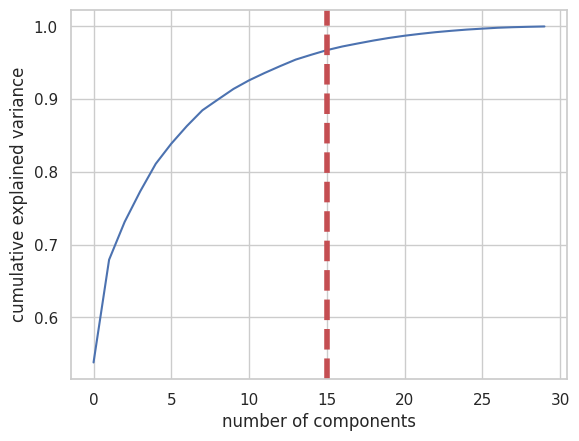

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.537925,0.537925
1,0.679109,0.141183
2,0.731093,0.051984
3,0.773044,0.041951
4,0.810971,0.037927
5,0.838653,0.027682
6,0.862814,0.024161
7,0.884505,0.021691
8,0.899295,0.014790
9,0.913866,0.014571


In [ ]:
from sklearn.decomposition import PCA

pca_test = PCA(n_components=30)
pca_test.fit(X_train)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=15, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(10))